In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from matplotlib.lines import Line2D
from IPython.display import display
from torchvision.transforms import ToPILImage

# Import pcam.py
sys.path.insert(1, '../pcam.py')
from pcam import get_dataloaders

In [2]:
# Import model outputs

folder_path = os.path.join('..','models','SwinTransformer_lr01_epoch10_flip')
output_files = [file_path for file_path in os.listdir(folder_path) if 'outputs' in file_path]

output_files_data = []
for output_file in output_files:
    output_files_data.append(pd.read_csv(os.path.join(folder_path,output_file)))


outputs = pd.concat(output_files_data)

group_by_test_run = outputs.groupby(outputs.index)

pos_mean = group_by_test_run.mean()['pos_probs'].to_numpy()
pos_var = group_by_test_run.var()['pos_probs'].to_numpy()
neg_mean = group_by_test_run.mean()['neg_probs'].to_numpy()
neg_var = group_by_test_run.var()['neg_probs'].to_numpy()

labels = group_by_test_run.mean()['labels']
true_pos_idx = labels == 1
true_neg_idx = labels == 0
        

In [3]:
s=1  # Marker size
alpha = 0.3  # Transparency
fig_size = (7,5)
colors = ['tab:orange', 'tab:blue']
color_labels = [colors[int(label)] for label in labels]

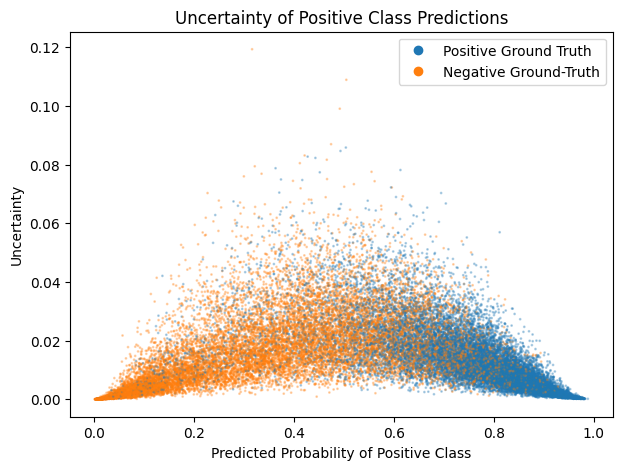

In [4]:
plt.figure(figsize=fig_size)
plt.title('Uncertainty of Positive Class Predictions')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Uncertainty')
sc = plt.scatter(pos_mean, pos_var, s=s, alpha=alpha, color=color_labels)

handles, _ = plt.gca().get_legend_handles_labels()
pos_legend = Line2D([0], [0], label='Positive Ground Truth', color='tab:blue', marker='o', markersize=6, linestyle='')
neg_legend = Line2D([0], [0], label='Negative Ground-Truth', color='tab:orange', marker='o', markersize=6, linestyle='')
handles.extend([pos_legend, neg_legend])
plt.legend(handles=handles)

#TODO: Plot some examples

In [17]:
_, _, test_loader = get_dataloaders('../data', 512, train=False, shuffle=False, download=True, resize=96, augment=False, normalize=False)

uncertain_group = []
uncertain_group_img = []
certain_group = []
certain_group_img = []

# Certain Group
j = 0
print('Certain Group')
for i in range(len(pos_var)):
    if 0.4 < pos_mean[i] < 0.6 and pos_var[i] < 0.01:
        print(pos_mean[i],pos_var[i])
        certain_group.append(i)
        j += 1
        if j == 4:
            break     
   
print()
   
# Uncertain Group         
j = 0
print('Uncertain Group')
for i in range(len(pos_var)):
    if 0.4 < pos_mean[i] < 0.6 and pos_var[i] > 0.08:
        print(pos_mean[i],pos_var[i])
        uncertain_group.append(i)
        j += 1
        if j == 4:
            break        

Certain Group
0.5286787331104279 0.00540848761023764
0.5610563606023788 0.009338812847849938
0.4928146839141846 0.007611941678714141
0.44359639286994934 0.005192148976275253

Uncertain Group
0.4657472066581249 0.08165493424445307
0.5038842745125294 0.08581030146606558
0.42133757527917626 0.083109089695399
0.411819314956665 0.08048521937881577


Certain Group


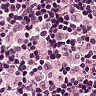

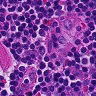

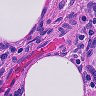

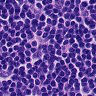

In [18]:
print('Certain Group')
t = ToPILImage()
for id in certain_group:
    display(t(test_loader.dataset[id][0]))

Uncertain Group


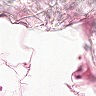

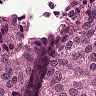

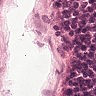

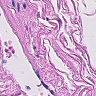

In [19]:
print('Uncertain Group')
t = ToPILImage()
for id in uncertain_group:
    display(t(test_loader.dataset[id][0]))

In [8]:
# plt.figure(figsize=fig_size)
# plt.title('Uncertainty of Positive Predictions')
# plt.xlabel('Accuracy')
# plt.ylabel('Uncertainty')
# plt.scatter(1 - np.abs(pos_mean[true_pos_idx]-labels[true_pos_idx]),pos_var[true_pos_idx], s=s, alpha=alpha)
# plt.scatter(1 - np.abs(pos_mean[true_neg_idx]-labels[true_neg_idx]),pos_var[true_neg_idx], s=s, alpha=alpha)
# plt.legend(['Correct', 'Incorrect'])

# plt.figure(figsize=fig_size)
# plt.title('Uncertainty of Negative Predictions')
# plt.xlabel('Predicted Probability')
# plt.ylabel('Uncertainty')
# plt.scatter(neg_mean[true_neg_idx],neg_var[true_neg_idx], s=s, alpha=alpha)
# plt.scatter(neg_mean[true_pos_idx],neg_var[true_pos_idx], s=s, alpha=alpha)
# plt.legend(['Correct', 'Incorrect'])